## Цены на недвижимость в Москве

### Описание набора данных

Этот набор данных содержит информацию, необходимую для прогнозирования цен на жилье в Москве и Московской области. Данные, собранные в ноябре 2023 года, актуальны и подходят для анализа. Он включает в себя различные атрибуты, имеющие решающее значение для прогнозирования стоимости жилья, такие как местоположение, размер, удобства и другие важные факторы, влияющие на цены на недвижимость.

*Описание столбцов*


- **Цена**: Цена квартиры в указанной валюте. Это основная целевая переменная для прогнозирования.<br>
- **Тип квартиры**: Тип квартиры, например, студия, однокомнатная, двухкомнатная и т. д.<br>
- **Станция метро**: Название ближайшей станции метро к месту расположения квартиры.<br>
- **Минуты до метро**: Время в минутах, необходимое для того, чтобы дойти от квартиры до ближайшей станции метро.<br>
- **Регион**: Регион, где находится квартира (Москва или Московская область).<br>
- **Количество комнат**: Общее количество комнат в квартире, включая спальни, гостиные и т. д.<br>
- **Площадь**: Общая площадь квартиры в квадратных метрах.<br>
- **Жилая площадь**: Жилая площадь квартиры в квадратных метрах, то есть площадь, пригодная для проживания.<br>
- **Площадь кухни**: Площадь кухни в квадратных метрах.<br>
- **Этаж**: Этаж, на котором расположена квартира.<br>
- **Этажность**: Общее количество этажей в доме, в котором расположена квартира.<br>
- **Ремонт**: Уровень ремонта квартиры, например «без ремонта», «косметический ремонт», «евроремонт» и т. д.

Импорт библиотек:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка данных из датасета:

In [3]:
data = pd.read_csv('dataset/data.csv', sep=",")

### Основные характеристики датасета

Первые 5 строк датасета:

In [4]:
data.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


Размеры датасета

In [5]:
print("Строк: " + str(data.shape[0]))

Строк: 22676


In [6]:
print("Столбцов: " + str(data.shape[1]))

Столбцов: 12


Столбцы

In [7]:
# Список колонок
data.columns

Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')

In [8]:
# Список колонок с типами данных
data.dtypes

Price               float64
Apartment type       object
Metro station        object
Minutes to metro    float64
Region               object
Number of rooms     float64
Area                float64
Living area         float64
Kitchen area        float64
Floor               float64
Number of floors      int64
Renovation           object
dtype: object

In [9]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Price - 0
Apartment type - 0
Metro station - 0
Minutes to metro - 0
Region - 0
Number of rooms - 0
Area - 0
Living area - 0
Kitchen area - 0
Floor - 0
Number of floors - 0
Renovation - 0


Описание

In [10]:
# Основные статистические характеристки набора данных
data.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


### Визуальное исследование датасета

#### Диаграмма рассеяния

<Axes: xlabel='Area', ylabel='Price'>

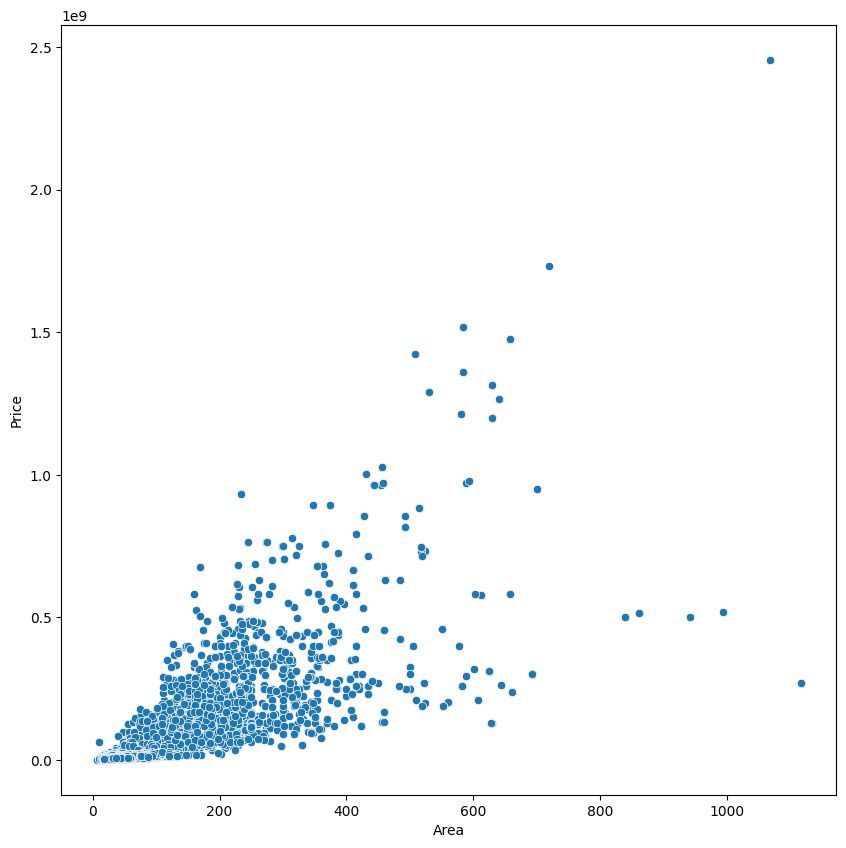

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Area', y='Price', data=data)

#### Гистограмма

C:\Users\veronika\AppData\Local\Temp\ipykernel_21476\203751661.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

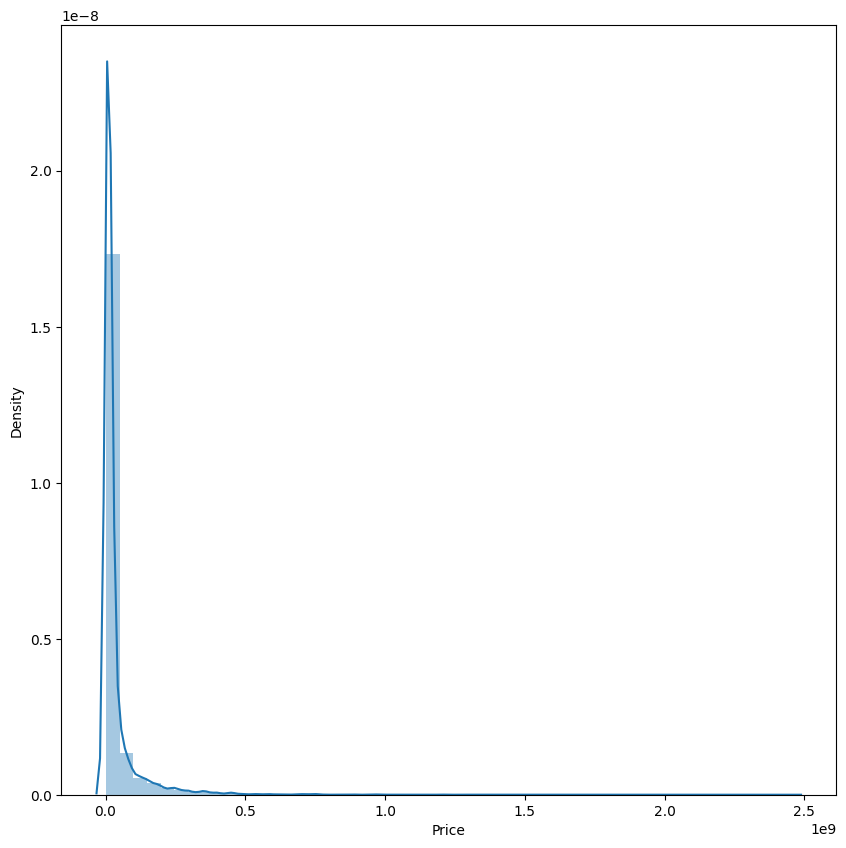

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Price'])

#### Jointplot

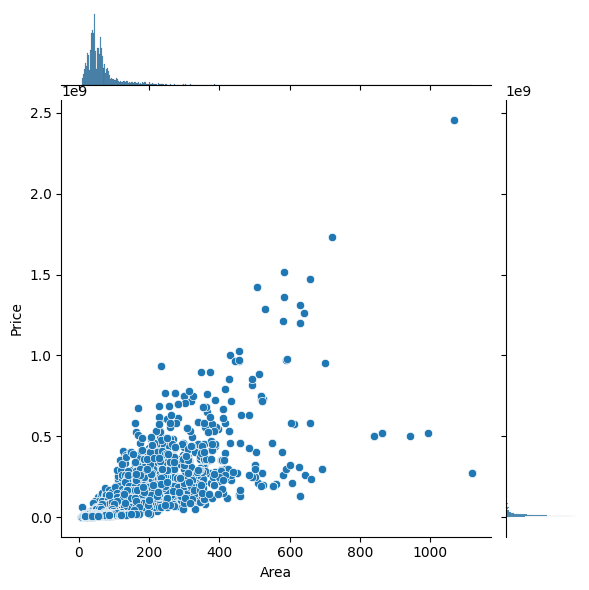

In [13]:
sns.jointplot(x='Area', y='Price', data=data)

#### "Парные диаграммы"

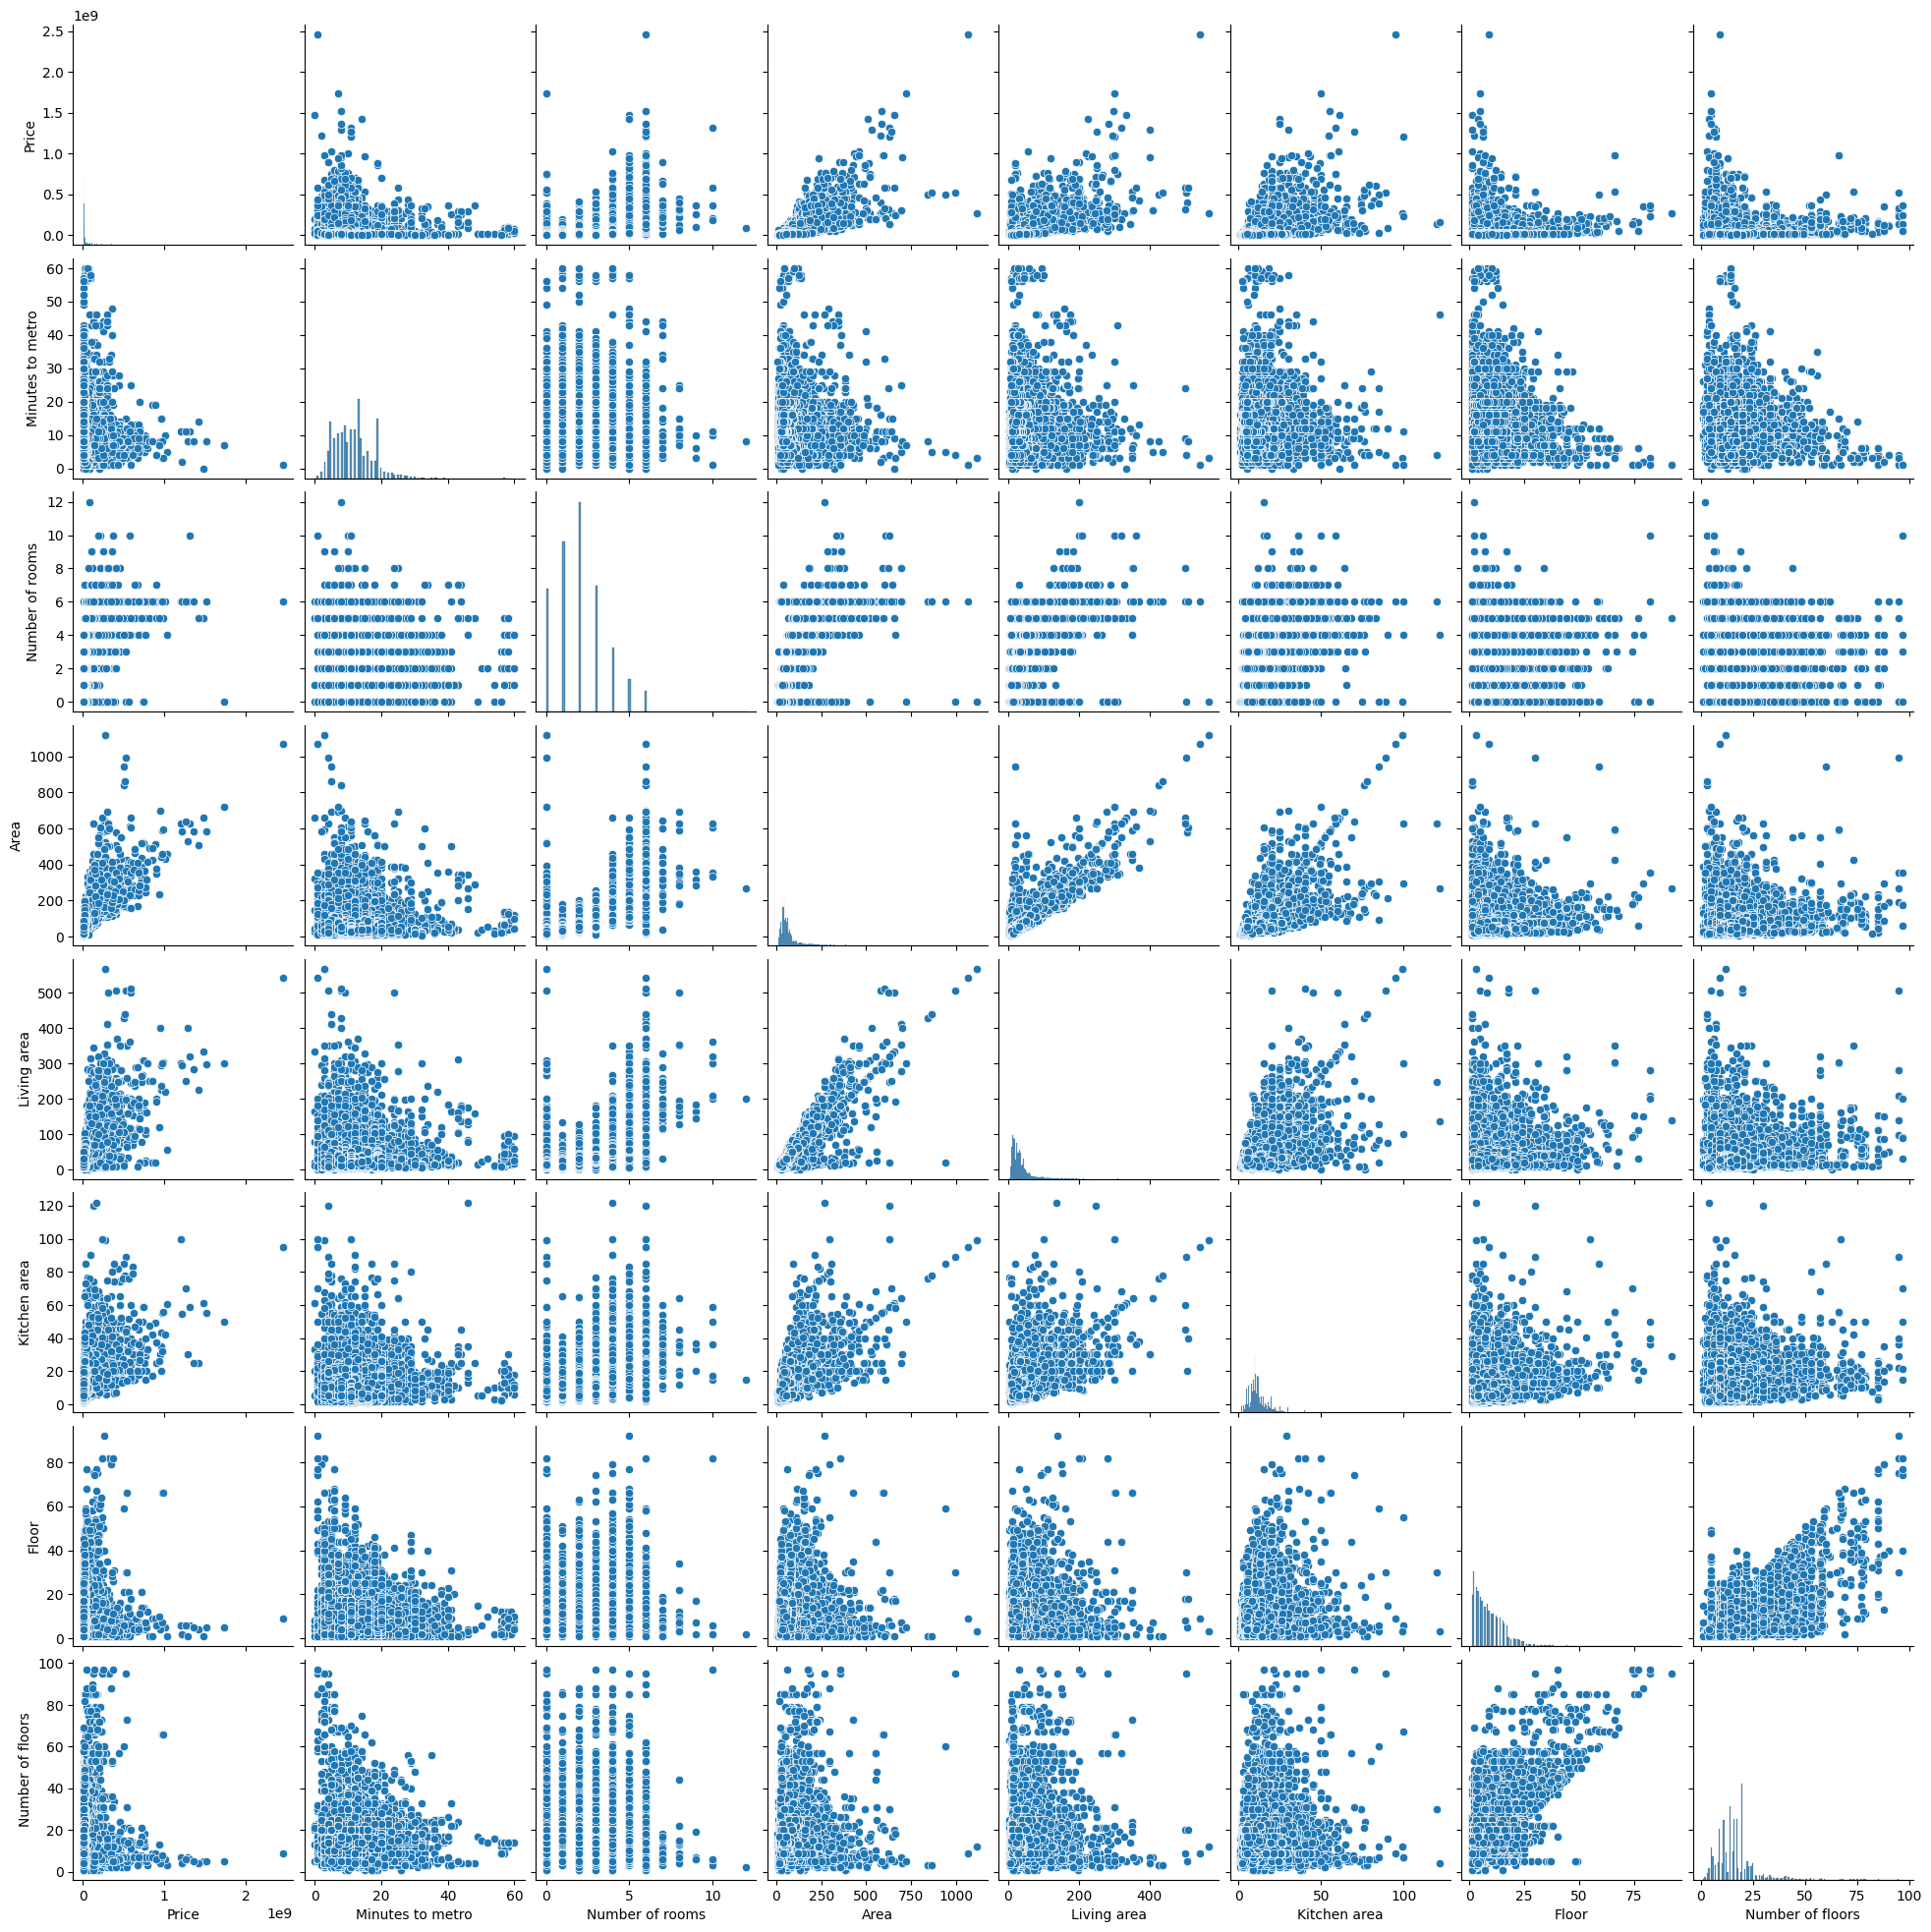

In [15]:
sns.pairplot(data)

С группировкой по признаку "Price":

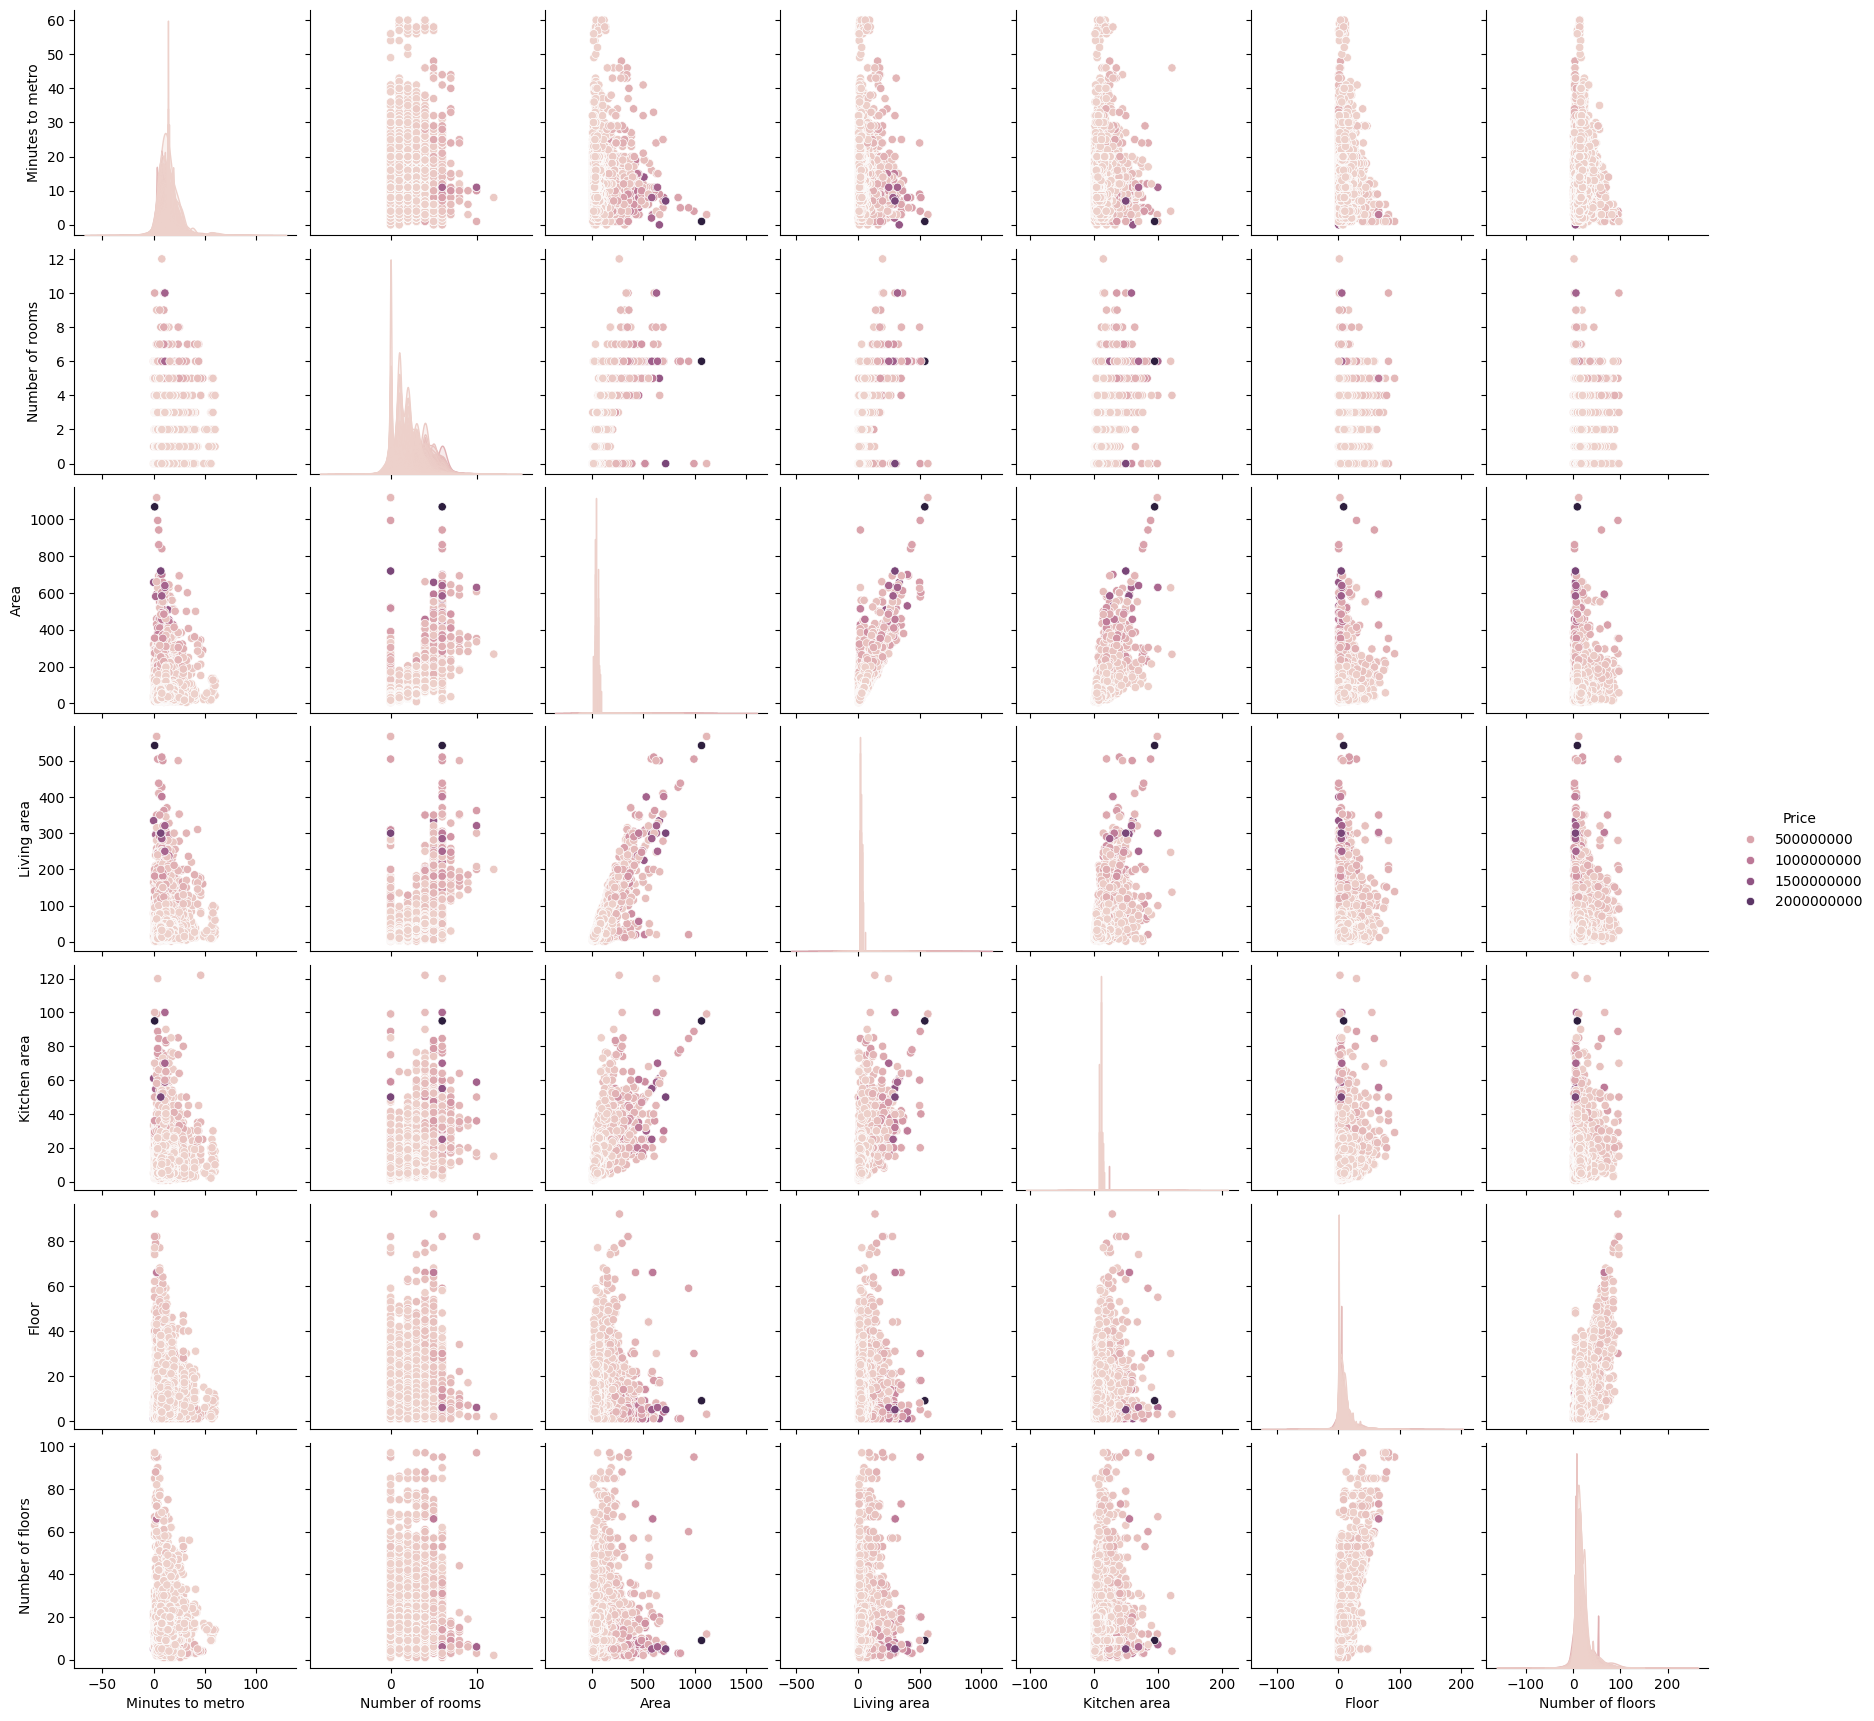

In [17]:
sns.pairplot(data, hue="Price")

#### "Ящик с усами"

<Axes: xlabel='Minutes to metro'>

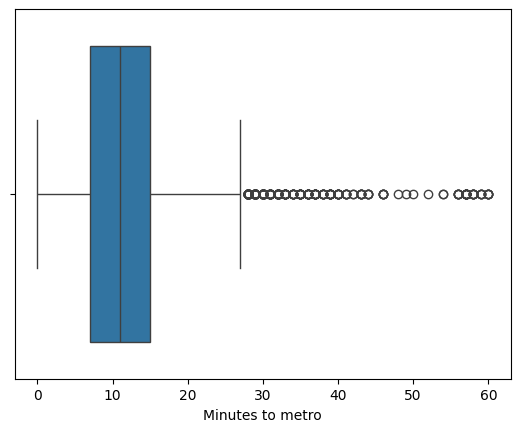

In [25]:
sns.boxplot(x=data['Minutes to metro'])

<Axes: ylabel='Minutes to metro'>

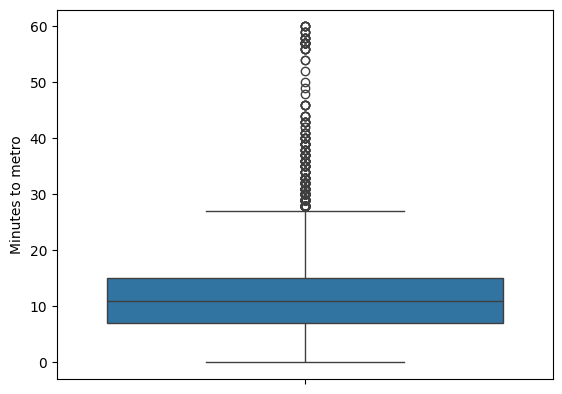

In [24]:
# по вертикали
sns.boxplot(y=data['Minutes to metro'])

<Axes: xlabel='Region', ylabel='Area'>

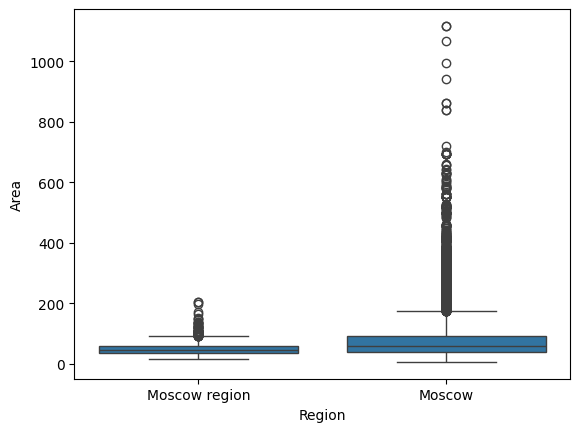

In [36]:
# Распределение параметра Area сгруппированные по Number of rooms.
sns.boxplot(x='Region', y='Area', data=data)

#### "Violin diagram"

<Axes: xlabel='Minutes to metro'>

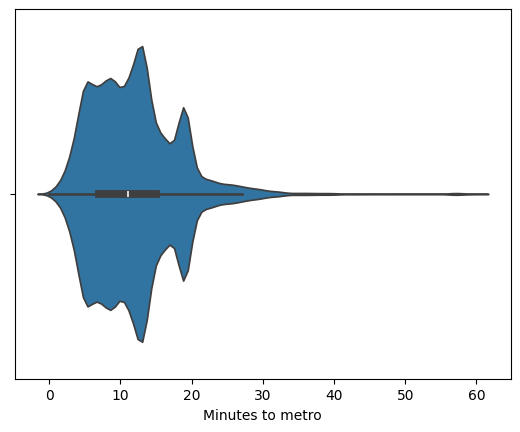

In [27]:
sns.violinplot(x=data['Minutes to metro'])

C:\Users\veronika\AppData\Local\Temp\ipykernel_21476\4197193313.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Minutes to metro'], ax=ax[1])


<Axes: xlabel='Minutes to metro', ylabel='Density'>

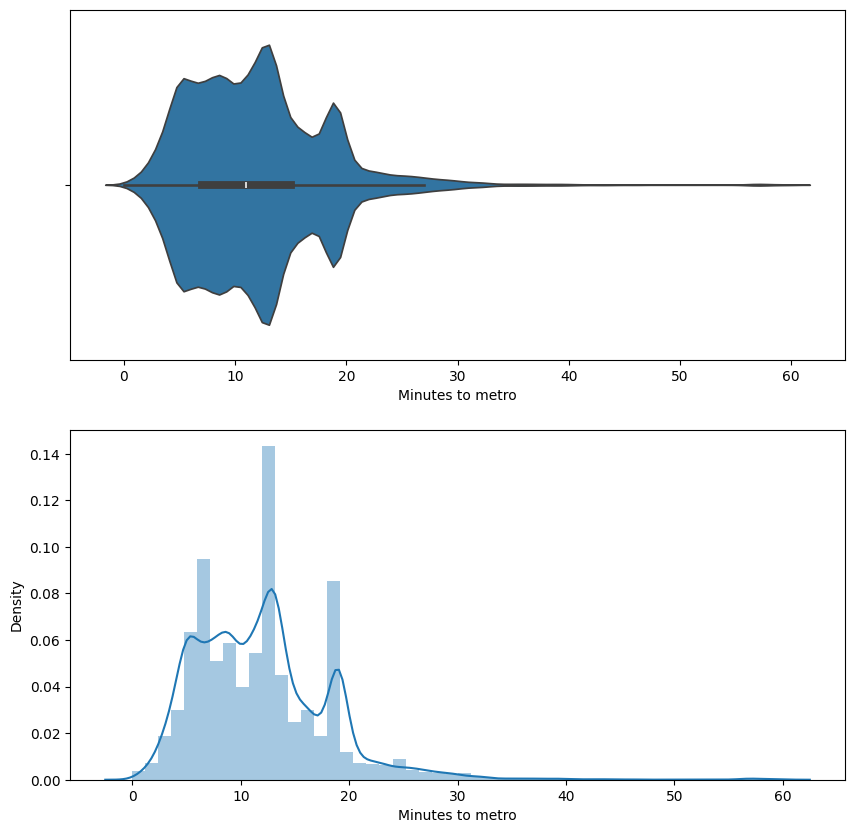

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Minutes to metro'])
sns.distplot(data['Minutes to metro'], ax=ax[1])

<Axes: xlabel='Region', ylabel='Area'>

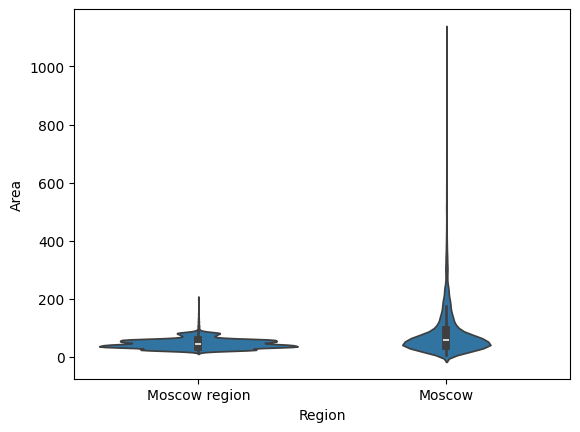

In [35]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='Region', y='Area', data=data)

### Информация о корреляции признаков

Исключим текстовые поля и найдем корреляцию оставшихся признаков.

In [39]:
data1 = data.drop(['Apartment type', 'Metro station', 'Region', 'Renovation'], axis=1)
data1.corr()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
Price,1.000000,-0.105382,0.490820,0.794226,0.709296,0.582940,0.019080,-0.022134
Minutes to metro,-0.105382,1.000000,-0.082357,-0.094937,-0.085614,-0.062436,0.017230,-0.031209
Number of rooms,0.490820,-0.082357,1.000000,0.687145,0.657565,0.476534,0.087446,0.074045
Area,0.794226,-0.094937,0.687145,1.000000,0.906604,0.731963,0.083480,0.044465
Living area,0.709296,-0.085614,0.657565,0.906604,1.000000,0.610039,0.072477,0.036737
Kitchen area,0.582940,-0.062436,0.476534,0.731963,0.610039,1.000000,0.133737,0.108035
Floor,0.019080,0.017230,0.087446,0.083480,0.072477,0.133737,1.000000,0.596803
Number of floors,-0.022134,-0.031209,0.074045,0.044465,0.036737,0.108035,0.596803,1.000000


In [40]:
data1.corr(method='pearson')

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
Price,1.000000,-0.105382,0.490820,0.794226,0.709296,0.582940,0.019080,-0.022134
Minutes to metro,-0.105382,1.000000,-0.082357,-0.094937,-0.085614,-0.062436,0.017230,-0.031209
Number of rooms,0.490820,-0.082357,1.000000,0.687145,0.657565,0.476534,0.087446,0.074045
Area,0.794226,-0.094937,0.687145,1.000000,0.906604,0.731963,0.083480,0.044465
Living area,0.709296,-0.085614,0.657565,0.906604,1.000000,0.610039,0.072477,0.036737
Kitchen area,0.582940,-0.062436,0.476534,0.731963,0.610039,1.000000,0.133737,0.108035
Floor,0.019080,0.017230,0.087446,0.083480,0.072477,0.133737,1.000000,0.596803
Number of floors,-0.022134,-0.031209,0.074045,0.044465,0.036737,0.108035,0.596803,1.000000


In [48]:
data1.corr(method='kendall')

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
Price,1.000000,-0.077135,0.533386,0.621870,0.546266,0.408373,0.024846,-0.001193
Minutes to metro,-0.077135,1.000000,-0.082109,-0.089950,-0.071946,-0.060075,0.054567,-0.005022
Number of rooms,0.533386,-0.082109,1.000000,0.730015,0.693943,0.358168,0.054171,0.030860
Area,0.621870,-0.089950,0.730015,1.000000,0.781877,0.519948,0.058121,0.026223
Living area,0.546266,-0.071946,0.693943,0.781877,1.000000,0.349223,0.039100,0.010750
Kitchen area,0.408373,-0.060075,0.358168,0.519948,0.349223,1.000000,0.099675,0.074217
Floor,0.024846,0.054567,0.054171,0.058121,0.039100,0.099675,1.000000,0.356198
Number of floors,-0.001193,-0.005022,0.030860,0.026223,0.010750,0.074217,0.356198,1.000000


In [42]:
data1.corr(method='spearman')

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
Price,1.000000,-0.117317,0.662617,0.802978,0.717982,0.570844,0.037355,0.004079
Minutes to metro,-0.117317,1.000000,-0.110084,-0.132447,-0.105287,-0.087107,0.077405,-0.003608
Number of rooms,0.662617,-0.110084,1.000000,0.827770,0.791584,0.446263,0.074394,0.040487
Area,0.802978,-0.132447,0.827770,1.000000,0.905419,0.674696,0.086652,0.038480
Living area,0.717982,-0.105287,0.791584,0.905419,1.000000,0.454573,0.058762,0.015680
Kitchen area,0.570844,-0.087107,0.446263,0.674696,0.454573,1.000000,0.143584,0.104664
Floor,0.037355,0.077405,0.074394,0.086652,0.058762,0.143584,1.000000,0.477703
Number of floors,0.004079,-0.003608,0.040487,0.038480,0.015680,0.104664,0.477703,1.000000


<Axes: >

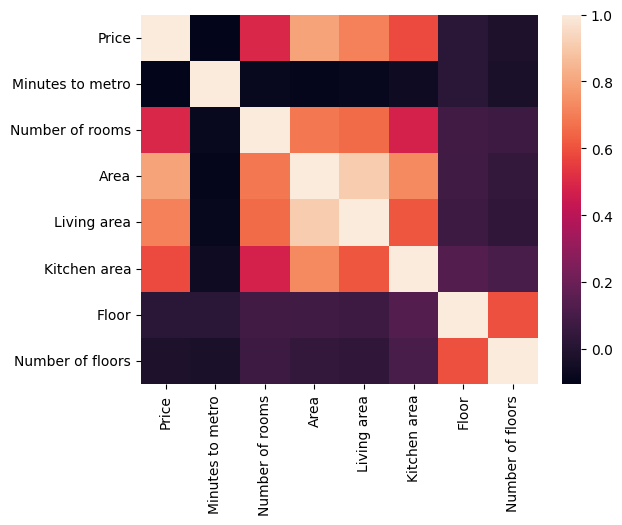

In [44]:
sns.heatmap(data1.corr())

<Axes: >

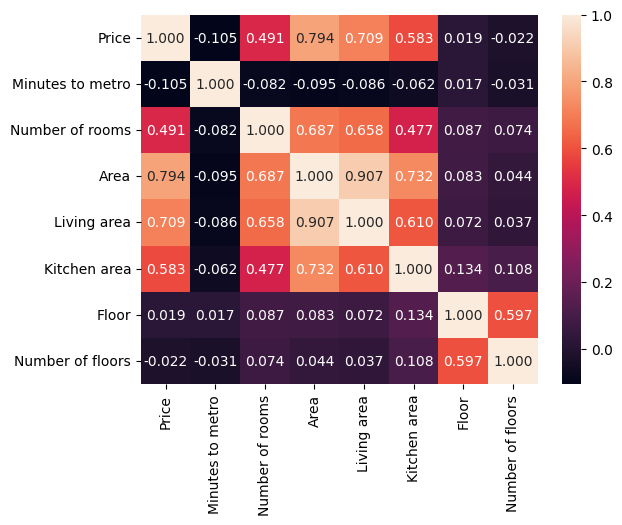

In [45]:
# Вывод значений в ячейках
sns.heatmap(data1.corr(), annot=True, fmt='.3f')

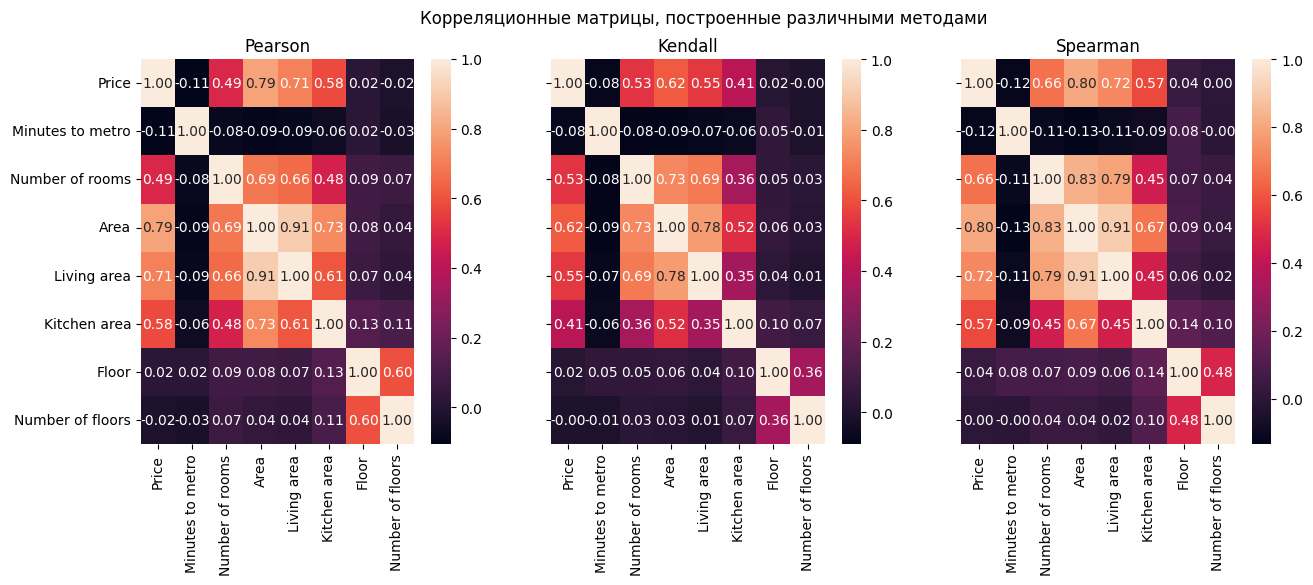

In [47]:
data = data1
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')